<a href="https://colab.research.google.com/github/flaviabiaty/analise_profissao_dados/blob/main/ProfissaoDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Etapa 1** *importando e explorando os dados*

In [1]:
import pandas as pd

Importação da base de dados (.csv) disponibilizada em gitHub

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/flaviabiaty/analise_profissao_dados/refs/heads/main/basedados.csv")

Mostrar as primeiras linhas da base (head) para podermos conhecer a estrutura:

In [5]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


Apresentar os tipos dos dados de cada coluna:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


Apresentar as estatísticas descritivas dos dados quantitativos da base


In [7]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


Mostrar a dimensão da base de dados: linhas, colunas

In [ ]:
df.shape

(133349, 11)

In [ ]:
linhas, colunas = df.shape[0], df.shape[1]
print("linhas: ",linhas)
print("colunas: ",colunas)


linhas:  133349
colunas:  11


Apresentar o título de todas as colunas da base:

In [ ]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

Renomear título das colunas para português

In [ ]:
renomear_colunas = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}

df.rename(columns=renomear_colunas, inplace=True)
display(df.head())

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


Análise das variáveis qualitativas: criação de tabelas de frequência via value_counts()

In [ ]:
df["senioridade"].value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [ ]:
df["contrato"].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


In [ ]:
df["remoto"].value_counts()

,count
remoto,
0,105312
100,27718
50,319


Traduzir labels dos dados para dar maior clareza

In [ ]:
senioridade = {
    'SE': 'Senior',
    'MI': 'Pleno',
    'EN': 'Junior',
    'EX': 'Executivo'
}

df["senioridade"] = df["senioridade"].replace(senioridade)
df["senioridade"].value_counts()


,count
senioridade,
Senior,77241
Pleno,40465
Junior,12443
Executivo,3200


In [ ]:
contrato = {
    'FT': 'Tempo Integral',
    'CT': 'Tempo Parcial',
    'PT': 'Freelancer',
    'FL': 'Contrato'
}

df["contrato"]=df["contrato"].replace(contrato)
df["contrato"].value_counts()

,count
contrato,
Tempo Integral,132563
Tempo Parcial,394
Freelancer,376
Contrato,16


In [ ]:
tamanho_empresa = {
    'M': 'Media',
    'L': 'Grande',
    'S': 'Pequena',
}

df["tamanho_empresa"]=df["tamanho_empresa"].replace(tamanho_empresa)
df["tamanho_empresa"].value_counts()

,count
tamanho_empresa,
Media,129561
Grande,3574
Pequena,214


In [ ]:
remoto = {
    0: 'Presencial',
    50: 'Hibrido',
    100: 'Remoto',
}

df["remoto"]=df["remoto"].replace(remoto)
df["remoto"].value_counts()

,count
remoto,
Presencial,105312
Remoto,27718
Hibrido,319


In [ ]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


Criar tabela de frequência para todos os dados qualitativos da base

In [ ]:
df.describe(include='object')

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Tempo Integral,Data Scientist,USD,US,Presencial,US,Media
freq,77241,132563,17314,126140,119579,105312,119641,129561


##**Etapa 2** *limpeza e preparação da base*

Identificar onde há dados nulos

---



In [ ]:
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


Especificar quais os anos que existem na base. Método com os valores únicos do campo: unique()

In [ ]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

Exibir os registros que são nan (Not a Number)

In [ ]:
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Senior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Media
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Media
59710,NaN,Junior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Media
59759,NaN,Senior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Media
59789,NaN,Senior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Media
131000,NaN,Senior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Media
131006,NaN,Senior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Media
133054,NaN,Junior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Hibrido,US,Grande




---



Criação de um novo dataframe somente para exemplificar o tratamento de valores nulos

Nesse teste, vou preencher com a média e a mediana dos demais valores

In [ ]:
import numpy as np
#criação de dataframe de teste
df_salarios = pd.DataFrame({
    'nome': ['Ana', 'Bruno', 'Carlos', 'Daniele', 'Val'],
    'salario': [4000, np.nan, 5000, np.nan, 100000]
                            })

#calcula a média salarial e substitui os nulos pela média, arredondando os valores em 2 casas decimais
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))
# substitui os nulos pela mediana dos demais valores
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())
df_salarios

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniele,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


Preenchendo Nan com valor anterior

In [ ]:
df_temperaturas = pd.DataFrame({
    "Dia": ["Segunda", "Terca", 'Quarta', 'Quinta', 'Sexta'],
    'Temperatura': [30, np.nan, np.nan, 28, 27]
})

#Completa com o valor anterior
df_temperaturas['Preenchido_ffil'] = df_temperaturas["Temperatura"].ffill()
#Preenchendo com o posterior
df_temperaturas['Preenchido_bfil'] = df_temperaturas["Temperatura"].bfill()
df_temperaturas


,Dia,Temperatura,Preenchido_ffil,Preenchido_bfil
0,Segunda,30.0,30.0,30.0
1,Terca,NaN,30.0,28.0
2,Quarta,NaN,30.0,28.0
3,Quinta,28.0,28.0,28.0
4,Sexta,27.0,27.0,27.0


In [ ]:
df_cidades = pd.DataFrame({
    'nome': ['Ana', 'Bruno', 'Carlos', 'Daniele', 'Val'],
    'cidades': ['São Paulo', np.nan, 'Curitiba', np.nan, 'Belém']
                            })
df_cidades['idade_preenchida'] = df_cidades["cidades"].fillna("Não informado")
df_cidades

,nome,cidades,idade_preenchida
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,Não informado
2,Carlos,Curitiba,Curitiba
3,Daniele,NaN,Não informado
4,Val,Belém,Belém




---



Em uma nova base de dados (df_limpo) vou limpar os dados não informados

In [ ]:
df_limpo=df.dropna()
df_limpo.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [ ]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


Alteração do tipo de dado para inteiro (int)

In [ ]:
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype(int))
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


##**Etapa 3** *criação de gráficos*

In [ ]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


criação de gráficos com a própria biblioteca pandas

<Axes: title={'center': 'Distribuição de senioridade'}, xlabel='senioridade', ylabel='Quantidade de Funcionários'>

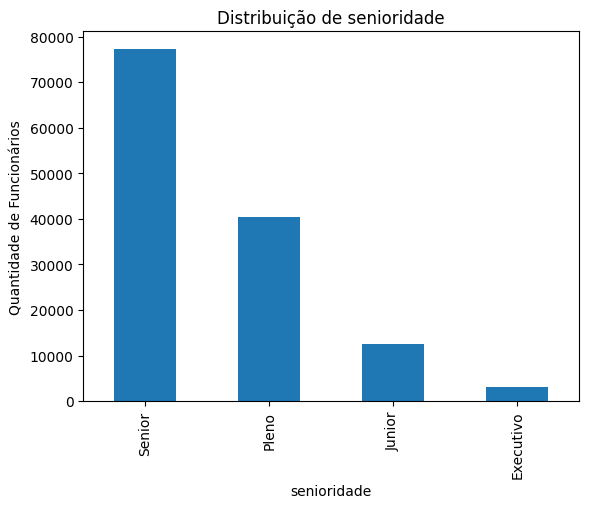

In [ ]:
df_limpo['senioridade'].value_counts().plot(kind='bar', ylabel='Quantidade de Funcionários', title="Distribuição de senioridade")

Outras bibliotecas para melhorar a criação de gráficos: "Matplotlib" e "Seaborn"

In [ ]:
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='usd'>

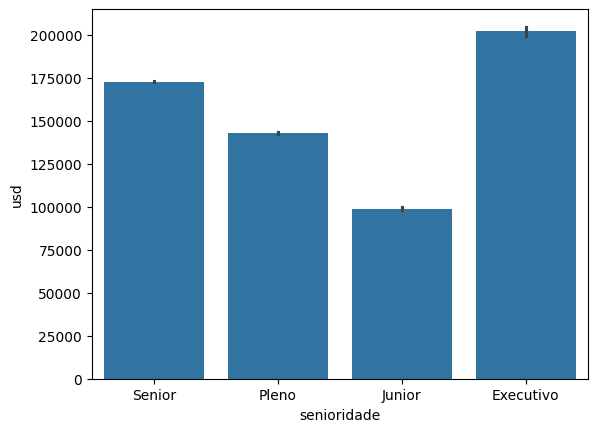

In [ ]:
sns.barplot(data=df_limpo, x='senioridade', y='usd')

In [ ]:
import matplotlib.pyplot as plt

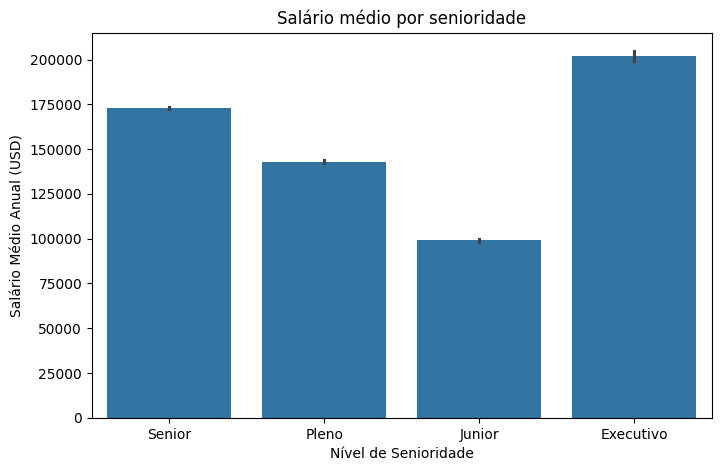

In [ ]:
#definição do tamanho do gráfico
plt.figure(figsize=(8,5))
#criação do gráfico
sns.barplot(data=df_limpo, x='senioridade', y='usd')
plt.title('Salário médio por senioridade')
plt.xlabel('Nível de Senioridade')
plt.ylabel('Salário Médio Anual (USD)')
plt.show()

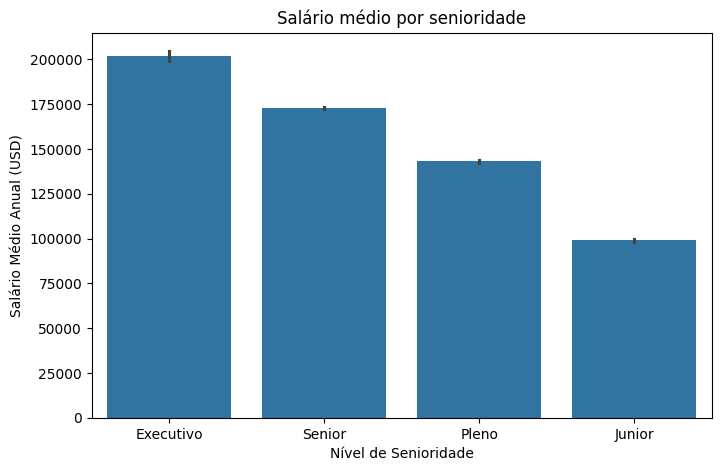

In [ ]:
ordem = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).index
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x='senioridade', y='usd', order=ordem)
plt.title('Salário médio por senioridade')
plt.xlabel('Nível de Senioridade')
plt.ylabel('Salário Médio Anual (USD)')
plt.show()



média dos salários em us$: 157619.07933912807


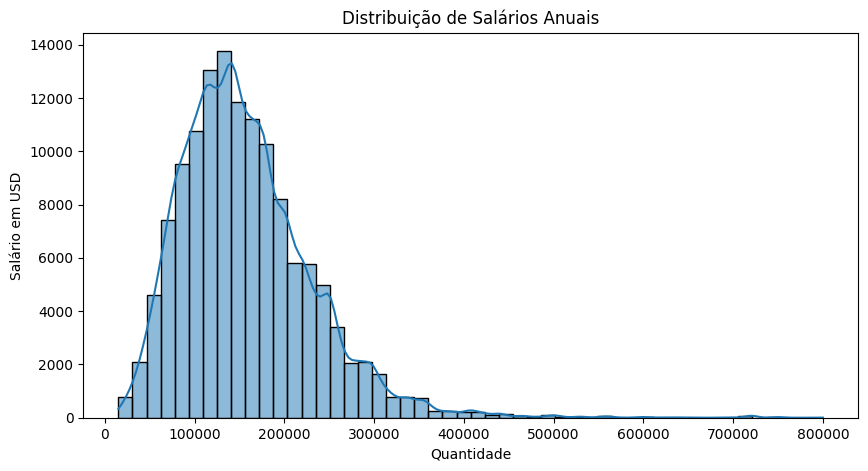

In [ ]:
plt.figure(figsize=(10,5))
#bin: largura das barras, quanto maior, mais fino. kde é a linha dos dados
sns.histplot(df_limpo['usd'], bins=50, kde=True)
plt.title('Distribuição de Salários Anuais')
plt.xlabel('Quantidade')
plt.ylabel('Salário em USD')
print('média dos salários em us$:', df_limpo['usd'].mean())
plt.show()


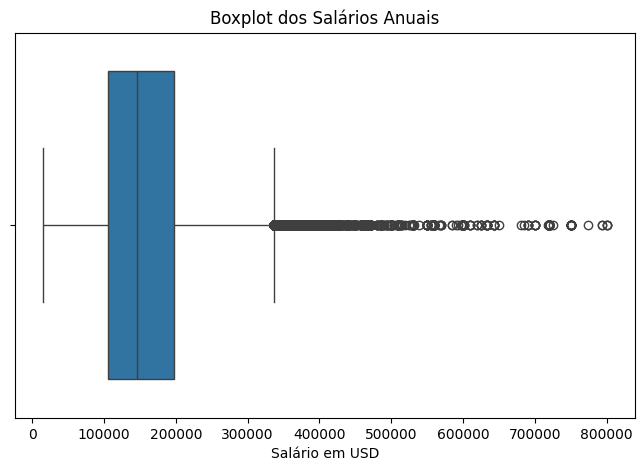

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_limpo['usd'])
plt.title('Boxplot dos Salários Anuais')
plt.xlabel('Salário em USD')
plt.show()

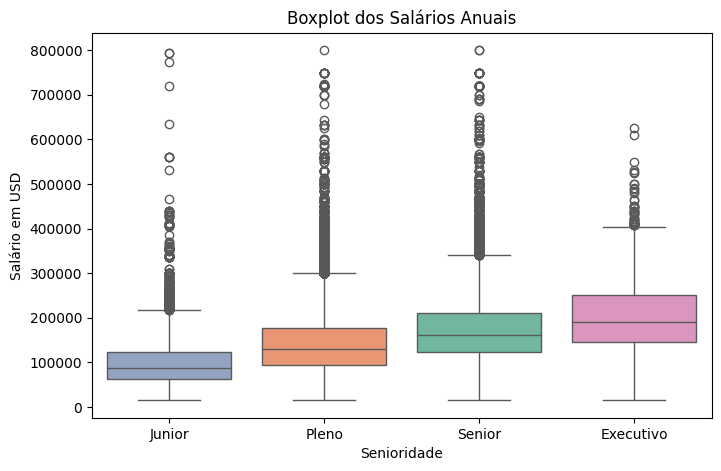

In [ ]:
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']
plt.figure(figsize=(8,5))
sns.boxplot(data=df_limpo, x='senioridade', y='usd', order=ordem_senioridade, palette='Set2', hue='senioridade')
plt.title('Boxplot dos Salários Anuais')
plt.xlabel('Senioridade')
plt.ylabel('Salário em USD')
plt.show()

Para gráficos mais interativos, é interessante utilizar o Plotly

In [ ]:
import plotly.express as px

In [ ]:
#gráfico de média salarial por senioridade em barras
fig = px.bar(df_limpo.groupby('senioridade')['usd'].mean().reset_index(),
             x='senioridade',
             y='usd',
             title='Salário médio por senioridade',
             labels={'senioridade': 'Nível de Senioridade', 'usd': 'Salário Médio Anual (USD)'},
             text_auto=True)

fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray':['Junior', 'Pleno', 'Senior', 'Executivo']})
fig.show()

In [ ]:
#gráfico de mediana salarial por senioridade em barras
fig = px.bar(df_limpo.groupby('senioridade')['usd'].median().reset_index(),
             x='senioridade',
             y='usd',
             title='Mediana dos salários (USD) por senioridade',
             labels={'senioridade': 'Nível de Senioridade', 'usd': 'Salário Médio Anual (USD)'},
             text_auto=True)

fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray':['Junior', 'Pleno', 'Senior', 'Executivo']})
fig.show()

In [ ]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']
fig = px.pie(remoto_contagem,
             values='quantidade',
             names='tipo_trabalho',
             title='Proporção dos Tipos de Trabalho')
fig.show()

In [ ]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']
fig = px.pie(remoto_contagem,
             values='quantidade',
             names='tipo_trabalho',
             title='Proporção dos Tipos de Trabalho',
             hole=0.5)
fig.update_traces(textinfo='percent+label')
fig.show()

##**Desafio** *criação de gráficos*
Criar um gráfico que apresente o salário, por país, para Cientistas de Dados

In [ ]:
df_limpo['cargo'].value_counts()

,count
cargo,
Data Scientist,17311
Software Engineer,15006
Data Engineer,14868
Data Analyst,12381
Engineer,9454
...,...
Quantitative Research Analyst,1
Data Science Tech Lead,1
Staff Machine Learning Engineer,1


In [ ]:
df_limpo['residencia'].value_counts()

,count
residencia,
US,119572
CA,5238
GB,3711
AU,517
NL,404
...,...
KW,1
AS,1
CN,1


In [ ]:
# Mapeamento de países para continentes
mapeamento_continentes = {
    'US': 'América do Norte',
    'CA': 'América do Norte',
    'GB': 'Europa',
    'AU': 'Oceania',
    'NL': 'Europa',
    'DE': 'Europa',
    'ES': 'Europa',
    'FR': 'Europa',
    'BR': 'América do Sul',
    'IT': 'Europa',
    'PT': 'Europa',
    'PL': 'Europa',
    'RU': 'Europa',
    'JP': 'Ásia',
    'IN': 'Ásia',
    'CN': 'Ásia',
    'MY': 'Ásia',
    'KR': 'Ásia',
    'SG': 'Ásia',
    'PK': 'Ásia',
    'IR': 'Ásia',
    'AE': 'Ásia',
    'TR': 'Ásia',
    'IL': 'Ásia',
    'SA': 'Ásia',
    'NG': 'África',
    'ZA': 'África',
    'DZ': 'África',
    'EG': 'África',
    'MA': 'África',
    'KE': 'África',
    'GH': 'África',
    'CO': 'América do Sul',
    'MX': 'América do Norte',
    'AR': 'América do Sul',
    'CL': 'América do Sul',
    'PE': 'América do Sul',
    'UY': 'América do Sul',
    'VE': 'América do Sul',
    'CR': 'América Central',
    'EE': 'Europa',
    'HR': 'Europa',
    'SI': 'Europa',
    'BA': 'Europa',
    'LV': 'Europa',
    'LT': 'Europa',
    'UA': 'Europa',
    'BG': 'Europa',
    'RO': 'Europa',
    'GR': 'Europa',
    'HU': 'Europa',
    'CZ': 'Europa',
    'SK': 'Europa',
    'AT': 'Europa',
    'CH': 'Europa',
    'BE': 'Europa',
    'DK': 'Europa',
    'NO': 'Europa',
    'SE': 'Europa',
    'FI': 'Europa',
    'IE': 'Europa',
    'IS': 'Europa',
    'LU': 'Europa',
    'MT': 'Europa',
    'CY': 'Europa',
    'GE': 'Europa',
    'AZ': 'Ásia',
    'KZ': 'Ásia',
    'UZ': 'Ásia',
    'KG': 'Ásia',
    'TJ': 'Ásia',
    'TM': 'Ásia',
    'AF': 'Ásia',
    'BD': 'Ásia',
    'MM': 'Ásia',
    'LK': 'Ásia',
    'NP': 'Ásia',
    'PH': 'Ásia',
    'ID': 'Ásia',
    'TH': 'Ásia',
    'VN': 'Ásia',
    'KH': 'Ásia',
    'LA': 'Ásia',
    'BN': 'Ásia',
    'TL': 'Ásia',
    'PG': 'Oceania',
    'SB': 'Oceania',
    'VU': 'Oceania',
    'FJ': 'Oceania',
    'NC': 'Oceania',
    'WF': 'Oceania',
    'TV': 'Oceania',
    'NR': 'Oceania',
    'MH': 'Oceania',
    'FM': 'Oceania',
    'PW': 'Oceania',
    'MP': 'Oceania',
    'GU': 'Oceania',
    'CK': 'Oceania',
    'NU': 'Oceania',
    'TK': 'Oceania',
    'WS': 'Oceania',
    'TO': 'Oceania',
    'KI': 'Oceania',
    'AS': 'Oceania',
    'UM': 'Oceania',
    'NZ': 'Oceania',
    'VI': 'América do Norte',
    'PR': 'América do Norte',
    'CU': 'América do Norte',
    'JM': 'América do Norte',
    'HT': 'América do Norte',
    'DO': 'América do Norte',
    'BS': 'América do Norte',
    'BB': 'América do Norte',
    'AW': 'América do Sul',
    'BQ': 'América do Sul',
    'CW': 'América do Sul',
    'SX': 'América do Sul',
    'AG': 'América do Norte',
    'AI': 'América do Norte',
    'BL': 'América do Norte',
    'BM': 'América do Norte',
    'KN': 'América do Norte',
    'LC': 'América do Norte',
    'MF': 'América do Norte',
    'MS': 'América do Norte',
    'TC': 'América do Norte',
    'VC': 'América do Norte',
    'VG': 'América do Norte',
    'MQ': 'América do Norte',
    'GP': 'América do Norte',
    'PM': 'América do Norte',
    'GL': 'América do Norte',
    'BZ': 'América Central',
    'GT': 'América Central',
    'HN': 'América Central',
    'NI': 'América Central',
    'SV': 'América Central',
    'PA': 'América Central',
    'EC': 'América do Sul',
    'BO': 'América do Sul',
    'PY': 'América do Sul',
    'SR': 'América do Sul',
    'GF': 'América do Sul',
    'FK': 'América do Sul',
    'GS': 'América do Sul',
    'AQ': 'Antártica',
    'TF': 'Antártica',
    'BV': 'Antártica',
    'HM': 'Antártica',
    'CC': 'Ásia',
    'CX': 'Ásia',
    'NF': 'Oceania',
    'NC': 'Oceania',
    'WF': 'Oceania',
    'PF': 'Oceania',
    'TK': 'Oceania',
    'PN': 'Oceania',
    'SH': 'África',
    'TA': 'África',
    'IC': 'África',
    'CV': 'África',
    'ST': 'África',
    'GQ': 'África',
    'GA': 'África',
    'CG': 'África',
    'CD': 'África',
    'AO': 'África',
    'ZM': 'África',
    'ZW': 'África',
    'MW': 'África',
    'MZ': 'África',
    'BW': 'África',
    'NA': 'África',
    'LS': 'África',
    'SZ': 'África',
    'RE': 'África',
    'YT': 'África',
    'KM': 'África',
    'SC': 'África',
    'MU': 'África',
    'DJ': 'África',
    'ER': 'África',
    'ET': 'África',
    'SO': 'África',
    'SS': 'África',
    'SD': 'África',
    'TD': 'África',
    'CF': 'África',
    'CM': 'África',
    'GQ': 'África',
    'GA': 'África',
    'CG': 'África',
    'CD': 'África',
    'AO': 'África',
    'ZM': 'África',
    'ZW': 'África',
    'MW': 'África',
    'MZ': 'África',
    'BW': 'África',
    'NA': 'África',
    'LS': 'África',
    'SZ': 'África',
    'RE': 'África',
    'YT': 'África',
    'KM': 'África',
    'SC': 'África',
    'MU': 'África',
    'DJ': 'África',
    'ER': 'África',
    'ET': 'África',
    'SO': 'África',
    'SS': 'África',
    'SD': 'África',
    'TD': 'África',
    'CF': 'África',
    'CM': 'África',
    'BF': 'África',
    'NE': 'África',
    'ML': 'África',
    'MR': 'África',
    'EH': 'África',
    'SN': 'África',
    'GM': 'África',
    'GW': 'África',
    'GN': 'África',
    'SL': 'África',
    'LR': 'África',
    'CI': 'África',
    'BV': 'Antártica',
    'GS': 'Antártica',
    'HM': 'Antártica',
    'TF': 'Antártica',
    'AQ': 'Antártica',
    'PS': 'Ásia',
    'TL': 'Ásia',
    'IO': 'Ásia',
    'CX': 'Ásia',
    'CC': 'Ásia',
    'UM': 'Oceania',
    'GU': 'Oceania',
    'MP': 'Oceania',
    'PW': 'Oceania',
    'FM': 'Oceania',
    'MH': 'Oceania',
    'KI': 'Oceania',
    'NR': 'Oceania',
    'TV': 'Oceania',
    'WF': 'Oceania',
    'NC': 'Oceania',
    'VU': 'Oceania',
    'SB': 'Oceania',
    'PG': 'Oceania',
    'CK': 'Oceania',
    'NU': 'Oceania',
    'TK': 'Oceania',
    'TO': 'Oceania',
    'WS': 'Oceania',
    'AS': 'Oceania',
    'FJ': 'Oceania',
    'PF': 'Oceania',
    'PN': 'Oceania',
    'NF': 'Oceania',
    'AI': 'América do Norte',
    'AG': 'América do Norte',
    'BB': 'América do Norte',
    'BS': 'América do Norte',
    'VG': 'América do Norte',
    'KY': 'América do Norte',
    'CU': 'América do Norte',
    'DM': 'América do Norte',
    'DO': 'América do Norte',
    'GD': 'América do Norte',
    'GP': 'América do Norte',
    'HT': 'América do Norte',
    'JM': 'América do Norte',
    'MQ': 'América do Norte',
    'MS': 'América do Norte',
    'PR': 'América do Norte',
    'BL': 'América do Norte',
    'KN': 'América do Norte',
    'LC': 'América do Norte',
    'MF': 'América do Norte',
    'PM': 'América do Norte',
    'VC': 'América do Norte',
    'TT': 'América do Norte',
    'TC': 'América do Norte',
    'VI': 'América do Norte',
    'AW': 'América do Sul',
    'BQ': 'América do Sul',
    'CW': 'América do Sul',
    'SX': 'América do Sul',
    'AR': 'América do Sul',
    'BO': 'América do Sul',
    'BR': 'América do Sul',
    'CL': 'América do Sul',
    'CO': 'América do Sul',
    'EC': 'América do Sul',
    'FK': 'América do Sul',
    'GF': 'América do Sul',
    'GY': 'América do Sul',
    'PY': 'América do Sul',
    'PE': 'América do Sul',
    'SR': 'América do Sul',
    'UY': 'América do Sul',
    'VE': 'América do Sul',
    'BZ': 'América Central',
    'CR': 'América Central',
    'SV': 'América Central',
    'GT': 'América Central',
    'HN': 'América Central',
    'NI': 'América Central',
    'PA': 'América Central',
    'AD': 'Europa',
    'AL': 'Europa',
    'AT': 'Europa',
    'BY': 'Europa',
    'BE': 'Europa',
    'BA': 'Europa',
    'BG': 'Europa',
    'HR': 'Europa',
    'CY': 'Europa',
    'CZ': 'Europa',
    'DK': 'Europa',
    'EE': 'Europa',
    'FO': 'Europa',
    'FI': 'Europa',
    'FR': 'Europa',
    'DE': 'Europa',
    'GI': 'Europa',
    'GR': 'Europa',
    'GG': 'Europa',
    'VA': 'Europa',
    'HU': 'Europa',
    'IS': 'Europa',
    'IE': 'Europa',
    'IM': 'Europa',
    'IT': 'Europa',
    'JE': 'Europa',
    'XK': 'Europa',
    'LV': 'Europa',
    'LI': 'Europa',
    'LT': 'Europa',
    'LU': 'Europa',
    'MT': 'Europa',
    'MD': 'Europa',
    'MC': 'Europa',
    'ME': 'Europa',
    'NL': 'Europa',
    'MK': 'Europa',
    'NO': 'Europa',
    'PL': 'Europa',
    'PT': 'Europa',
    'RO': 'Europa',
    'RU': 'Europa',
    'SM': 'Europa',
    'RS': 'Europa',
    'SK': 'Europa',
    'SI': 'Europa',
    'ES': 'Europa',
    'SJ': 'Europa',
    'SE': 'Europa',
    'CH': 'Europa',
    'UA': 'Europa',
    'GB': 'Europa',
    'AX': 'Europa',
    'TR': 'Ásia',
    'GE': 'Ásia',
    'AM': 'Ásia',
    'AZ': 'Ásia',
    'BH': 'Ásia',
    'BD': 'Ásia',
    'BT': 'Ásia',
    'BN': 'Ásia',
    'KH': 'Ásia',
    'CN': 'Ásia',
    'CY': 'Ásia',
    'TL': 'Ásia',
    'GE': 'Ásia',
    'HK': 'Ásia',
    'IN': 'Ásia',
    'ID': 'Ásia',
    'IR': 'Ásia',
    'IQ': 'Ásia',
    'IL': 'Ásia',
    'JP': 'Ásia',
    'JO': 'Ásia',
    'KZ': 'Ásia',
    'KW': 'Ásia',
    'KG': 'Ásia',
    'LA': 'Ásia',
    'LB': 'Ásia',
    'MO': 'Ásia',
    'MY': 'Ásia',
    'MV': 'Ásia',
    'MN': 'Ásia',
    'MM': 'Ásia',
    'NP': 'Ásia',
    'KP': 'Ásia',
    'KR': 'Ásia',
    'OM': 'Ásia',
    'PK': 'Ásia',
    'PS': 'Ásia',
    'PH': 'Ásia',
    'QA': 'Ásia',
    'SA': 'Ásia',
    'SG': 'Ásia',
    'LK': 'Ásia',
    'SY': 'Ásia',
    'TW': 'Ásia',
    'TJ': 'Ásia',
    'TH': 'Ásia',
    'TR': 'Ásia',
    'TM': 'Ásia',
    'AE': 'Ásia',
    'UZ': 'Ásia',
    'VN': 'Ásia',
    'YE': 'Ásia',
    'AU': 'Oceania',
    'FJ': 'Oceania',
    'KI': 'Oceania',
    'MH': 'Oceania',
    'FM': 'Oceania',
    'NR': 'Oceania',
    'PG': 'Oceania',
    'SB': 'Oceania',
    'TL': 'Ásia',
    'TO': 'Oceania',
    'TV': 'Oceania',
    'VU': 'Oceania',
    'WF': 'Oceania',
    'WS': 'Oceania',
    'DZ': 'África',
    'AO': 'África',
    'BJ': 'África',
    'BW': 'África',
    'BF': 'África',
    'BI': 'África',
    'CV': 'África',
    'CM': 'África',
    'CF': 'África',
    'TD': 'África',
    'KM': 'África',
    'CG': 'África',
    'CD': 'África',
    'CI': 'África',
    'DJ': 'África',
    'EG': 'África',
    'GQ': 'África',
    'ER': 'África',
    'ET': 'África',
    'GA': 'África',
    'GM': 'África',
    'GH': 'África',
    'GN': 'África',
    'GW': 'África',
    'KE': 'África',
    'LS': 'África',
    'LR': 'África',
    'LY': 'África',
    'MG': 'África',
    'MW': 'África',
    'ML': 'África',
    'MR': 'África',
    'MU': 'África',
    'YT': 'África',
    'MA': 'África',
    'MZ': 'África',
    'NA': 'África',
    'NE': 'África',
    'NG': 'África',
    'RW': 'África',
    'SH': 'África',
    'ST': 'África',
    'SN': 'África',
    'SC': 'África',
    'SL': 'África',
    'SO': 'África',
    'ZA': 'África',
    'SS': 'África',
    'SD': 'África',
    'SZ': 'África',
    'TZ': 'África',
    'TG': 'África',
    'TN': 'África',
    'UG': 'África',
    'EH': 'África',
    'ZM': 'África',
    'ZW': 'África'
}

df_limpo['continente'] = df_limpo['residencia'].map(mapeamento_continentes)

display(df_limpo.head())

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa,continente
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media,América do Norte
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media,América do Norte
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media,Oceania
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media,Oceania
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media,América do Norte


In [ ]:
df_limpo['continente'].unique()

array(['América do Norte', 'Oceania', 'Ásia', 'Europa', 'América do Sul',
       'África', 'América Central'], dtype=object)

In [ ]:
df_limpo[df_limpo['continente'].isnull()]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa,continente


In [ ]:
df = df_limpo.query("cargo=='Data Scientist'").groupby(['residencia','continente'])['usd'].mean().reset_index()
df = df.sort_values(by=['continente', 'usd'], ascending=[True, False])
fig = px.bar(
    df,
             x='residencia',
             y='usd',
             color='continente',
             title='Salário médio de Cientistas de Dados, por país e continentes',
                          labels={'residencia': 'País de residência', 'usd': 'Salário Médio Anual (USD)'},
    text_auto=True,
        )
fig.show()

In [ ]:
# 1) Instalar dependência (Colab)
!pip -q install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 38.1 MB/s eta 0:00:00


In [ ]:
# 2) Imports
#pycountry: para converter códigos ISO-2 → ISO-3 e obter nomes oficiais.
#re: expressões regulares (validar se o código tem exatamente 2 letras).
import pycountry
import re

# 3) Helpers
#Corrige códigos “alternativos” comuns:
SPECIAL_FIX = {
    "UK": "GB",  # comum: UK -> GB
    "EL": "GR",  # Grécia em contexto UE
    "KO": "XK",  # Kosovo às vezes KO -> XK
}

#Normaliza o valor (upper, strip), exige duas letras (A–Z).
#Aplica correções do SPECIAL_FIX.
#Se não passar na validação, retorna None (vai ser filtrado depois).
def clean_iso2(code):
    if pd.isna(code): return None
    c = str(code).upper().strip()
    if not re.fullmatch(r"[A-Z]{2}", c): return None
    return SPECIAL_FIX.get(c, c)

#Converte ISO-2 para ISO-3 (ex.: BR → BRA).
#Caso especial: XK → XKX (Kosovo “de facto”).
#Se não encontrar no banco do pycountry, retorna None.
def iso2_to_iso3(code2):
    if code2 is None: return None
    if code2 == "XK":  # Kosovo (não-ISO oficial)
        return "XKX"
    try:
        return pycountry.countries.get(alpha_2=code2).alpha_3
    except Exception:
        return None

#Converte ISO-3 para o nome oficial (ex.: BRA → “Brazil”).
#Trata Kosovo manualmente.
def iso3_to_name(code3):
    if code3 is None: return None
    if code3 == "XKX": return "Kosovo"
    try:
        return pycountry.countries.get(alpha_3=code3).name
    except Exception:
        return None

# 4) Padronizar e mapear
#Cria um dataframe de trabalho.
df_aux = df_limpo.copy()
#Normaliza residencia (duas letras válidas) → residencia_iso2.
df_aux["residencia_iso2"] = df_aux["residencia"].apply(clean_iso2)
#Converte para ISO-3 → residencia_iso3.
df_aux["residencia_iso3"] = df_aux["residencia_iso2"].apply(iso2_to_iso3)
#Adiciona o nome do país para ficar bonito no hover.
df_aux["country_name"] = df_aux["residencia_iso3"].apply(iso3_to_name)

# Diagnóstico de códigos problemáticos
# possiveis problemas:
#-invalid_iso2: entradas que não têm exatamente 2 letras (ou estão vazias).
#unmapped_iso2: códigos que são 2 letras válidas, mas não foram encontrados no pycountry (ex.: siglas internas).

invalid_iso2 = df_aux.loc[df_aux["residencia_iso2"].isna(), "residencia"].dropna().unique().tolist()
unmapped_iso2 = df_aux.loc[
    df_aux["residencia_iso2"].notna() & df_aux["residencia_iso3"].isna(),
    "residencia_iso2"
].unique().tolist()

# 6) Mensagem de checagem
if invalid_iso2:
    print("Entradas que não parecem ISO-2 válidas (ignoradas):", invalid_iso2)
if unmapped_iso2:
    print("Códigos ISO-2 sem mapeamento para ISO-3 (verificar):", unmapped_iso2)


df_limpo['pais'] = df_aux['residencia_iso3']
display(df_limpo.head())


,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa,continente,pais
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media,América do Norte,USA
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media,América do Norte,USA
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media,Oceania,AUS
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media,Oceania,AUS
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media,América do Norte,USA


In [ ]:
df_limpo['pais'].unique()

array(['USA', 'AUS', 'CAN', 'JPN', 'GBR', 'MEX', 'NLD', 'ESP', 'FRA',
       'MLT', 'ITA', 'LTU', 'PHL', 'NZL', 'DEU', 'LVA', 'IRL', 'MKD',
       'AUT', 'POL', 'SVK', 'BRA', 'SVN', 'FIN', 'HKG', 'LSO', 'IND',
       'JAM', 'CHE', 'BEL', 'IDN', 'PER', 'SGP', 'PRT', 'HUN', 'ROU',
       'ARG', 'ZAF', 'PAN', 'EST', 'LUX', 'DZA', 'EGY', 'CHL', 'GRC',
       'KEN', 'COD', 'SWE', 'KOR', 'TWN', 'NOR', 'CZE', 'TUR', 'NGA',
       'CYP', 'COL', 'DNK', 'ARE', 'BGR', 'JOR', 'SRB', 'UKR', 'PRI',
       'SLV', 'ECU', 'DOM', 'MYS', 'XKX', 'CRI', 'ZMB', 'ARM', 'RWA',
       'ISR', 'LBN', 'HRV', 'PAK', 'HND', 'VEN', 'BMU', 'VNM', 'GEO',
       'SAU', 'OMN', 'BIH', 'UGA', 'MUS', 'THA', 'QAT', 'RUS', 'TUN',
       'GHA', 'AND', 'MDA', 'UZB', 'CAF', 'KWT', 'IRN', 'ASM', 'CHN',
       'BOL', 'IRQ', 'JEY'], dtype=object)

In [ ]:
df_limpo[df_limpo['pais'].isnull()]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa,continente,pais


In [ ]:
df_pais = df_limpo.query("cargo=='Data Scientist'").groupby(['residencia','continente'])['usd'].agg(['mean', 'size']).reset_index()
df_pais.columns = ['residencia', 'continente', 'usd', 'count']
print('Cientistas de Dados, seus países de residência e salários médios (USD)')
display(df_pais)

Cientistas de Dados, seus países de residência e salários médios (USD)


,residencia,continente,usd,count
0,AD,Europa,50745.000000,1
1,AR,América do Sul,42000.000000,5
2,AT,Europa,50342.067797,59
3,AU,Oceania,112190.000000,49
4,BE,Europa,66790.750000,4
5,BG,Europa,152500.000000,2
6,BR,América do Sul,73720.909091,11
7,CA,América do Norte,140519.984762,525
8,CH,Europa,152256.666667,6
9,CL,América do Sul,69346.000000,3


In [ ]:
#cria base somente com 'Data Scientist'
df_ds = df_limpo[df_limpo['cargo'] == 'Data Scientist']
media_ds_pais = df_ds.groupby('pais')['usd'].mean().reset_index()

# Gerar o mapa
fig = px.choropleth(media_ds_pais,
                    locations='pais',
                    color='usd',
                    color_continuous_scale='rdylgn',
                    title='Salário médio de Cientista de Dados por país',
                    labels={'usd': 'Salário médio (USD)', 'pais': 'País'})

fig.show()

In [ ]:
df_ds = df_limpo[df_limpo['cargo'] == 'Data Scientist']
media_ds_pais = df_ds.groupby(['pais','continente'])['usd'].mean().reset_index()
fig = px.scatter_geo(media_ds_pais, locations="pais", color="continente",
                     size="usd",
                     projection="natural earth")
fig.show()

In [ ]:
df_limpo.to_csv('dados_final.csv', index=False)

##**Aula 4** *criação de dashboard*

- biblioteca Streamlit para a criação de um dashboard interativo simples, que permite visualizar dados filtrados e gerar gráficos de forma prática.


1. VSCode
2. Criar o ambiente virtual (python3 -m venv .venv)
3. Ativar o ambiente virtual em Windows: .venv\Scripts\Activate
4. Criar um arquivo chamado requirements.txt e adicionar os pacotes necessários
pandas==2.2.3
streamlit==1.44.1
plotly==5.24.1
5. no terminal: Instalar as bibliotecas necessárias (pip install -r requirements.txt)
6. Criar a Interface do Dashboard com Streamlit (em um arquivo app.py)
7. Realizar o deploy do Dashboard no Streamlit Cloud: https://streamlit.io/cloud



In [ ]:
df_filtrado = df_limpo
salario_medio = df_filtrado['usd'].mean()
salario_maximo = df_filtrado['usd'].max()
total_registros = df_filtrado.shape[0]
cargo_mais_frequente = df_filtrado["cargo"].mode()[0]

print("Salário médio", f"${salario_medio:,.0f}")
print("Salário máximo", f"${salario_maximo:,.0f}")
print("Total de registros", f"{total_registros:,}")
print("Cargo mais frequente", cargo_mais_frequente)

Salário médio $157,619
Salário máximo $800,000
Total de registros 133,339
Cargo mais frequente Data Scientist


In [ ]:
top_cargos = df_filtrado.groupby('cargo')['usd'].mean().nlargest(10).sort_values(ascending=True).reset_index()
grafico_cargos = px.bar(
            top_cargos,
            x='usd',
            y='cargo',
            orientation='h',
            title="Top 10 cargos por salário médio",
            labels={'usd': 'Média salarial anual (USD)', 'cargo': ''}
        )
grafico_cargos.update_layout(title_x=0.1, yaxis={'categoryorder':'total ascending'})
grafico_cargos.show()

In [ ]:
#df_filtrado = df_limpo[df_limpo['pais']=='BRA']
grafico_hist = px.histogram(
            df_filtrado,
            x='usd',
            nbins=30,
            title="Distribuição de salários anuais",
            labels={'usd': 'Faixa salarial (USD)', 'count': ''},

        )
grafico_hist.update_layout(title_x=0.1)
grafico_hist.show()


In [ ]:
remoto_contagem = df_filtrado['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']
grafico_remoto = px.pie(
            remoto_contagem,
            names='tipo_trabalho',
            values='quantidade',
            title='Proporção dos tipos de trabalho',
            hole=0.5
        )
grafico_remoto.update_traces(textinfo='percent+label')
grafico_remoto.update_layout(title_x=0.1)
grafico_remoto.show()